A maior parte dos usuários tem menos que 200 acessos nos anos de 2016, 2017 e começo de 2018. Ainda assim 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# lendo data frame e removendo coluna de index que foi salva
df = pd.read_csv("../data/logs2Sessoes2.csv", sep = ";")
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,data,hora,maquina,sessao,usuario
0,26/01/2016,15:21:01,lcc2-28,opened,2396499187178686315
1,26/01/2016,15:21:04,lcc2-29,opened,2396499187178686315
2,26/01/2016,15:30:55,lcc2-39,opened,2396499187178686315
3,26/01/2016,15:31:20,lcc2-09,opened,2396499187178686315
4,26/01/2016,15:31:23,lcc2-10,opened,2396499187178686315


In [3]:
#### Ajeitando o data frame ####
# com a função criada em outro arquivo 
df["sessao"]
% run analise.py

ajeitando_df(df)
df.head()

,data,hora,maquina,sessao,usuario,ano,mes,dia,dia_da_semana,hora_pura,turno,intervalo,numero_maquina
0,26/01/2016,15:21:01,lcc2-28,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,28
1,26/01/2016,15:21:04,lcc2-29,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,29
2,26/01/2016,15:30:55,lcc2-39,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,39
3,26/01/2016,15:31:20,lcc2-09,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,9
4,26/01/2016,15:31:23,lcc2-10,opened,2396499187178686315,2016,1,26,Ter,15,tarde,14h-16h,10


In [4]:
# selecionando as linhas de sessão aberta e verificando a quantidade de sessões que não foram fechadas
sessoes_abertas = df[df.sessao == "opened"]
qnt_sessoes = sessoes_abertas.size
n_fechadas = qnt_sessoes - df[df.sessao == "closed"].size 
print("Sessões abertas: ", sessoes_abertas.size, "\nSessões que não foram fechadas: ", n_fechadas)

Sessões abertas:  1025869 
Sessões que não foram fechadas:  362726


In [5]:
# quantas vezes cada usuario abriu sessão
frequencia = sessoes_abertas.groupby("usuario").count()
frequencia = frequencia[["data"]]
frequencia.columns = ["freq"]
frequencia.sort_values(by = "freq", ascending=False)


,freq
usuario,
-818095743421438535,3206
710203151364569887,1977
4010185481155475087,1927
6790375887576350655,1615
-8029875674051901993,1195
-8964805488632447931,1134
3952875937242617029,1115
8851394046529841223,928
260012301744219973,917


In [6]:
frequencia.describe()

,freq
count,995.000000
mean,79.309548
std,189.366791
min,1.000000
25%,6.000000
50%,27.000000
75%,76.000000
max,3206.000000


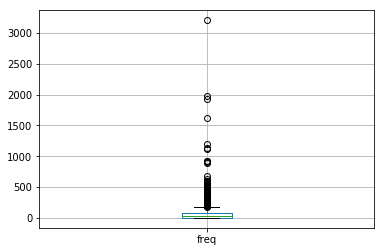

In [7]:
import matplotlib.pyplot as plt
frequencia[["freq"]].boxplot(
    return_type='axes')
